In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

DATA_PATH = os.path.join(os.pardir, 'data/datasets')
sns.set_style('whitegrid')

In [2]:
#state ids
states= [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY",
]

states.sort()


## Electricity Price Data

In [3]:
electricity_price = pd.read_csv(os.path.join(DATA_PATH, 'state_electricity_price.csv'))

In [4]:
electricity_price.head()

,period,stateid,sectorid,customers,price,revenue,sales,customers-units,price-units,revenue-units,sales-units
0,2016-09,MI,RES,4319629.0,15.71,444.15636,2828.03265,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
1,2016-09,MI,TRA,1.0,11.84,0.04042,0.34151,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
2,2016-09,MN,ALL,2688243.0,10.35,559.27182,5402.25632,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
3,2016-09,MN,COM,293329.0,10.64,207.72416,1952.39722,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
4,2016-09,MN,IND,9006.0,7.12,130.92767,1837.78312,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours


In [5]:
electricity_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109740 entries, 0 to 109739
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   period           109740 non-null  object 
 1   stateid          109740 non-null  object 
 2   sectorid         109740 non-null  object 
 3   customers        65410 non-null   float64
 4   price            91450 non-null   float64
 5   revenue          91450 non-null   float64
 6   sales            91450 non-null   float64
 7   customers-units  109740 non-null  object 
 8   price-units      109740 non-null  object 
 9   revenue-units    109740 non-null  object 
 10  sales-units      109740 non-null  object 
dtypes: float64(4), object(7)
memory usage: 9.2+ MB


All the missing electricity price values are in sectors 'OTH' and 'TRA'

In [6]:
electricity_price[electricity_price.price.isnull()].groupby('sectorid').describe()

customers                              price       ... revenue      \
             count mean std min 25% 50% 75% max count mean  ...     75% max   
sectorid                                                    ...               
OTH            0.0  NaN NaN NaN NaN NaN NaN NaN   0.0  NaN  ...     NaN NaN   
TRA            0.0  NaN NaN NaN NaN NaN NaN NaN   0.0  NaN  ...     NaN NaN   

         sales                               
         count mean std min 25% 50% 75% max  
sectorid                                     
OTH        0.0  NaN NaN NaN NaN NaN NaN NaN  
TRA        0.0  NaN NaN NaN NaN NaN NaN NaN  

[2 rows x 32 columns]

If we only want to focus on residential prices we will just get those.

In [7]:
residential_price = electricity_price[electricity_price.sectorid == 'RES']
residential_price = residential_price[residential_price.stateid.isin(states)]

In [8]:
residential_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14750 entries, 0 to 109738
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   period           14750 non-null  object 
 1   stateid          14750 non-null  object 
 2   sectorid         14750 non-null  object 
 3   customers        10550 non-null  float64
 4   price            14750 non-null  float64
 5   revenue          14750 non-null  float64
 6   sales            14750 non-null  float64
 7   customers-units  14750 non-null  object 
 8   price-units      14750 non-null  object 
 9   revenue-units    14750 non-null  object 
 10  sales-units      14750 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.4+ MB


In [9]:
residential_price.head()

,period,stateid,sectorid,customers,price,revenue,sales,customers-units,price-units,revenue-units,sales-units
0,2016-09,MI,RES,4319629.0,15.71,444.15636,2828.03265,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
6,2016-09,MN,RES,2385907.0,13.69,220.41301,1610.19430,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
14,2010-06,WY,RES,257909.0,9.14,16.33929,178.79932,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
24,2010-07,IA,RES,1327501.0,11.69,172.44963,1474.94199,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
30,2010-07,KS,RES,1227933.0,10.69,186.66034,1746.24751,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours


In [10]:
residential_price[residential_price.customers.isna()].sort_values(by='period')

,period,stateid,sectorid,customers,price,revenue,sales,customers-units,price-units,revenue-units,sales-units
62005,2001-01,PA,RES,NaN,8.74,446.72912,5112.70176,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
58437,2001-01,SC,RES,NaN,7.36,225.81673,3066.25911,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
58447,2001-01,WY,RES,NaN,6.01,15.07136,250.60591,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
59309,2001-01,FL,RES,NaN,8.14,851.05541,10457.91516,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
57474,2001-01,IA,RES,NaN,7.66,91.65440,1197.31380,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
...,...,...,...,...,...,...,...,...,...,...,...
71379,2007-12,WV,RES,NaN,6.74,82.31074,1220.69526,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
16929,2007-12,CO,RES,NaN,9.01,144.19872,1600.36387,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
16397,2007-12,AK,RES,NaN,15.57,33.36801,214.29288,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
71325,2007-12,RI,RES,NaN,14.62,42.15684,288.25323,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours


Not sure if we how much we should care about the missing customer values. That seems difficult to impute. 

In [11]:
residential_price['period'] = pd.to_datetime(residential_price['period'], format='%Y-%m')

In [12]:
residential_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14750 entries, 0 to 109738
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   period           14750 non-null  datetime64[ns]
 1   stateid          14750 non-null  object        
 2   sectorid         14750 non-null  object        
 3   customers        10550 non-null  float64       
 4   price            14750 non-null  float64       
 5   revenue          14750 non-null  float64       
 6   sales            14750 non-null  float64       
 7   customers-units  14750 non-null  object        
 8   price-units      14750 non-null  object        
 9   revenue-units    14750 non-null  object        
 10  sales-units      14750 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 1.4+ MB


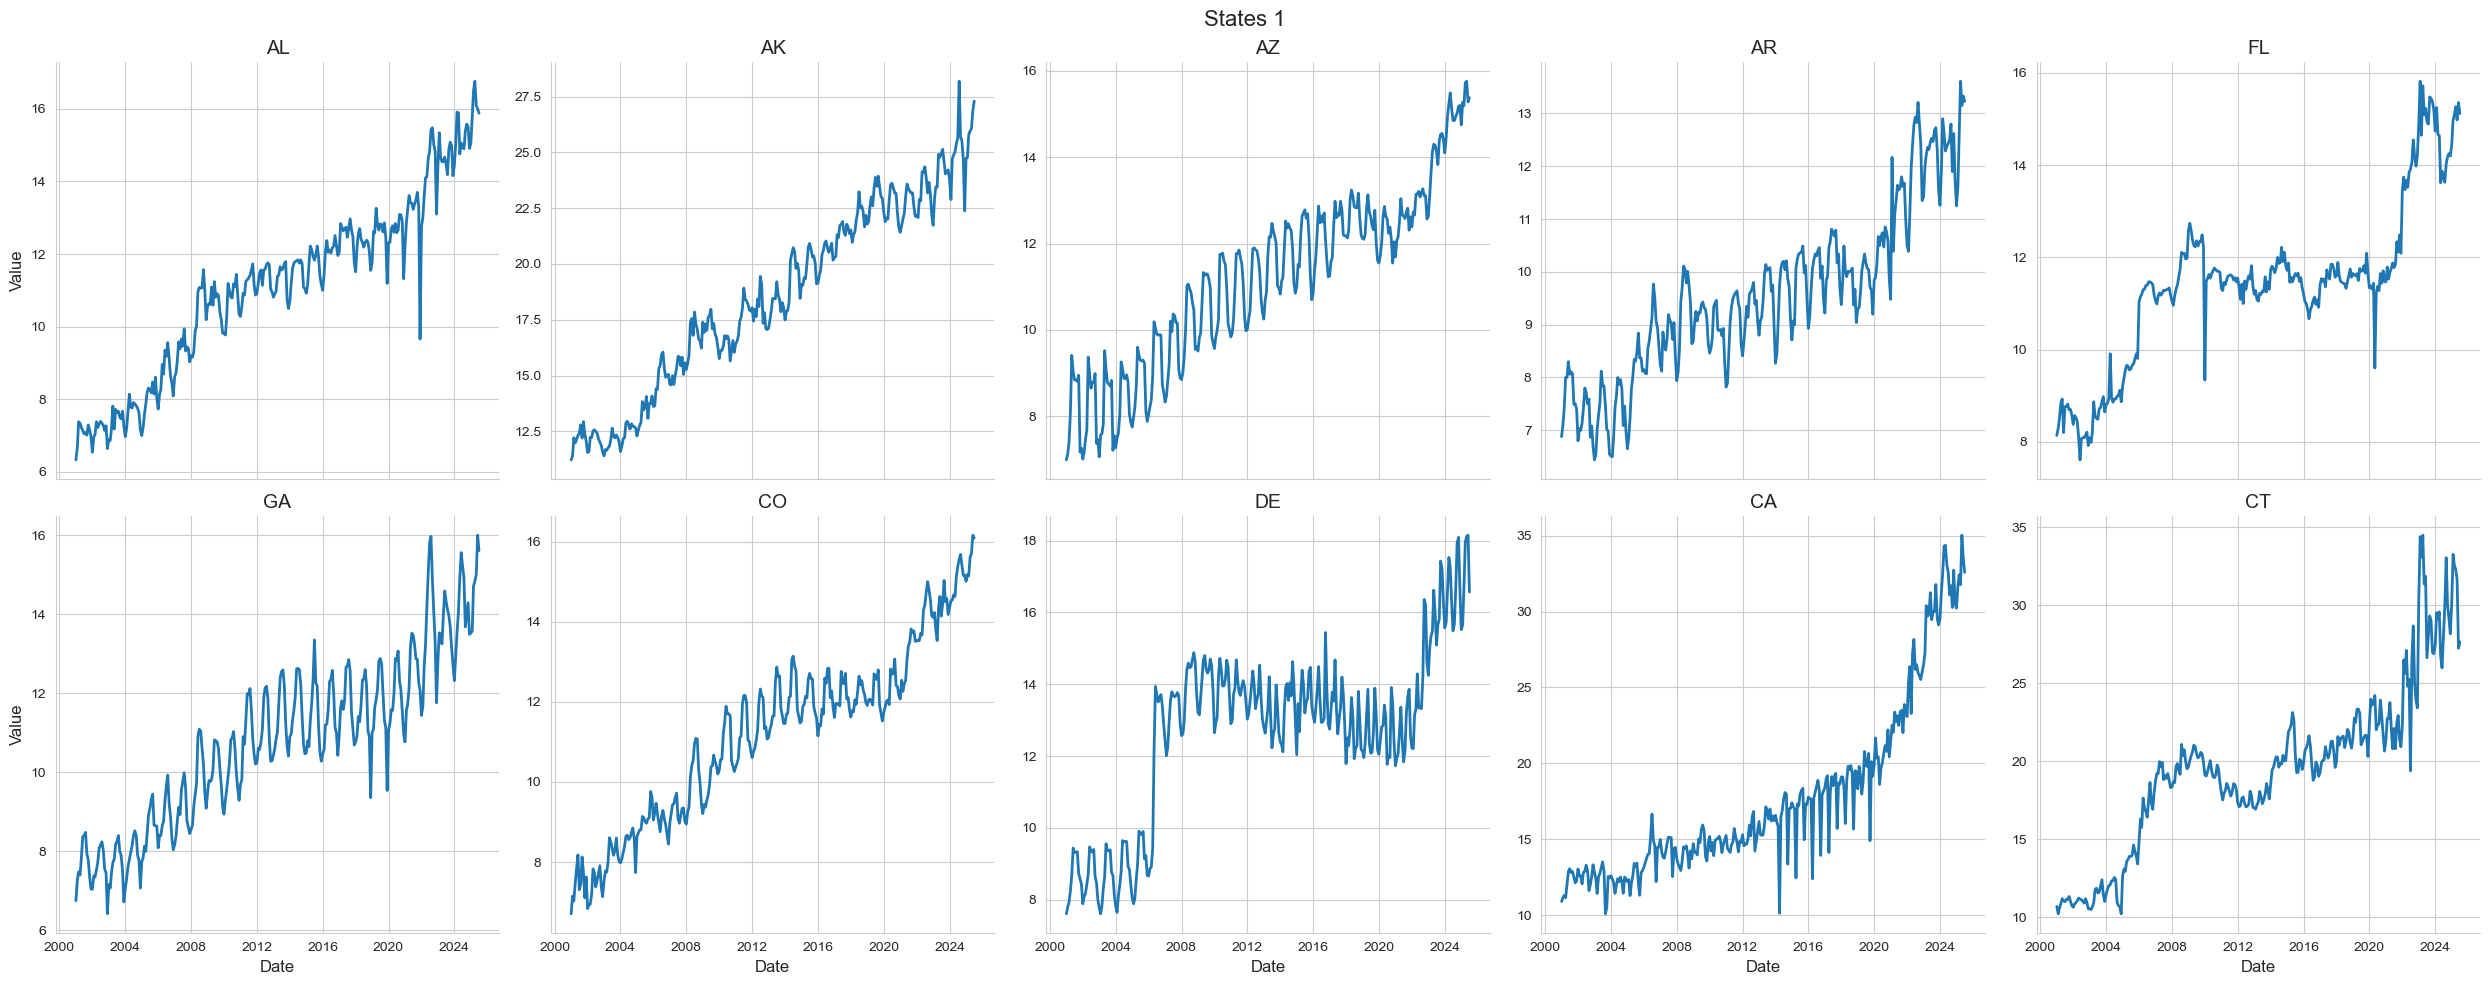

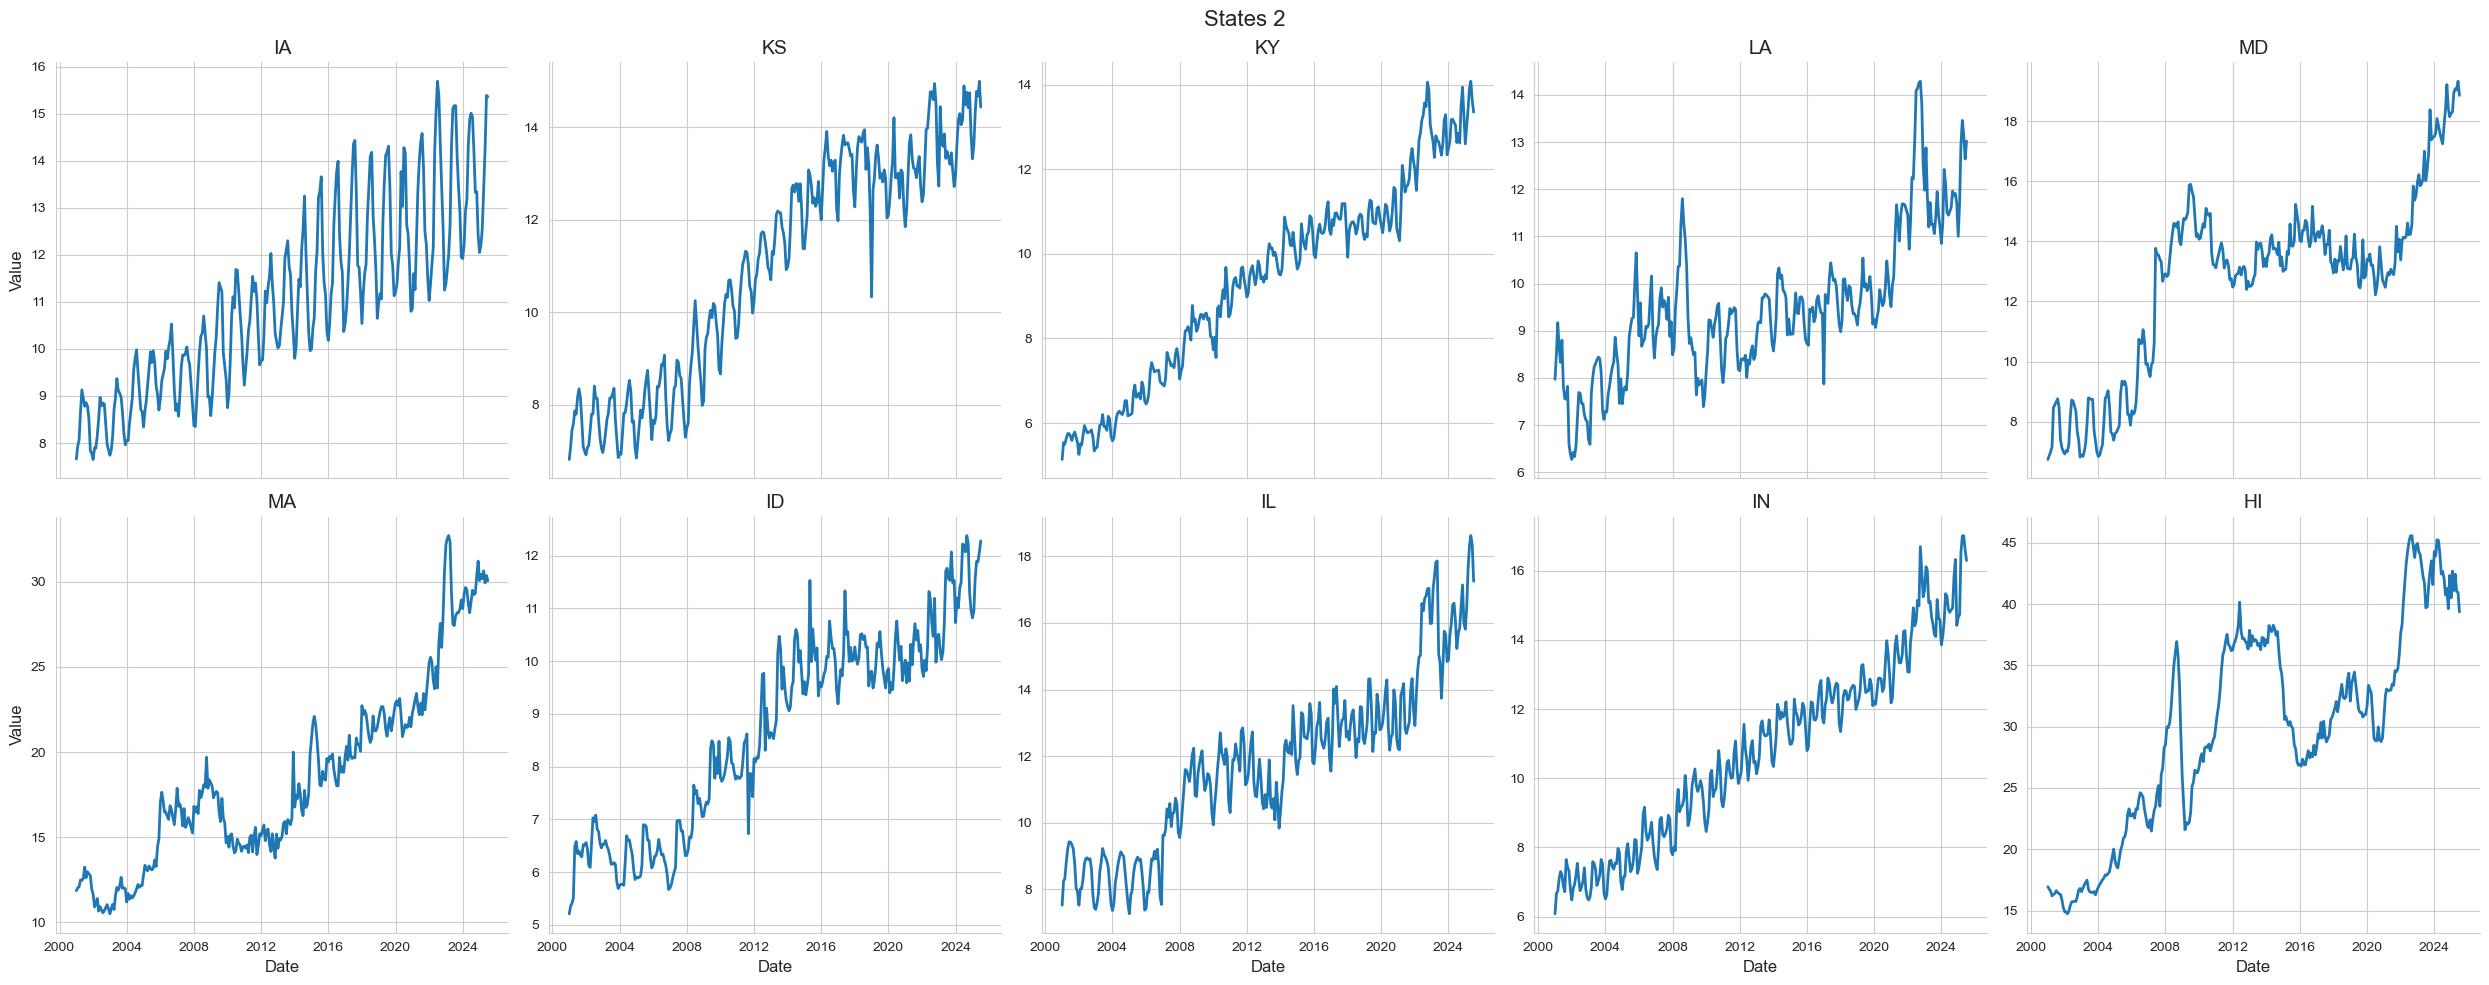

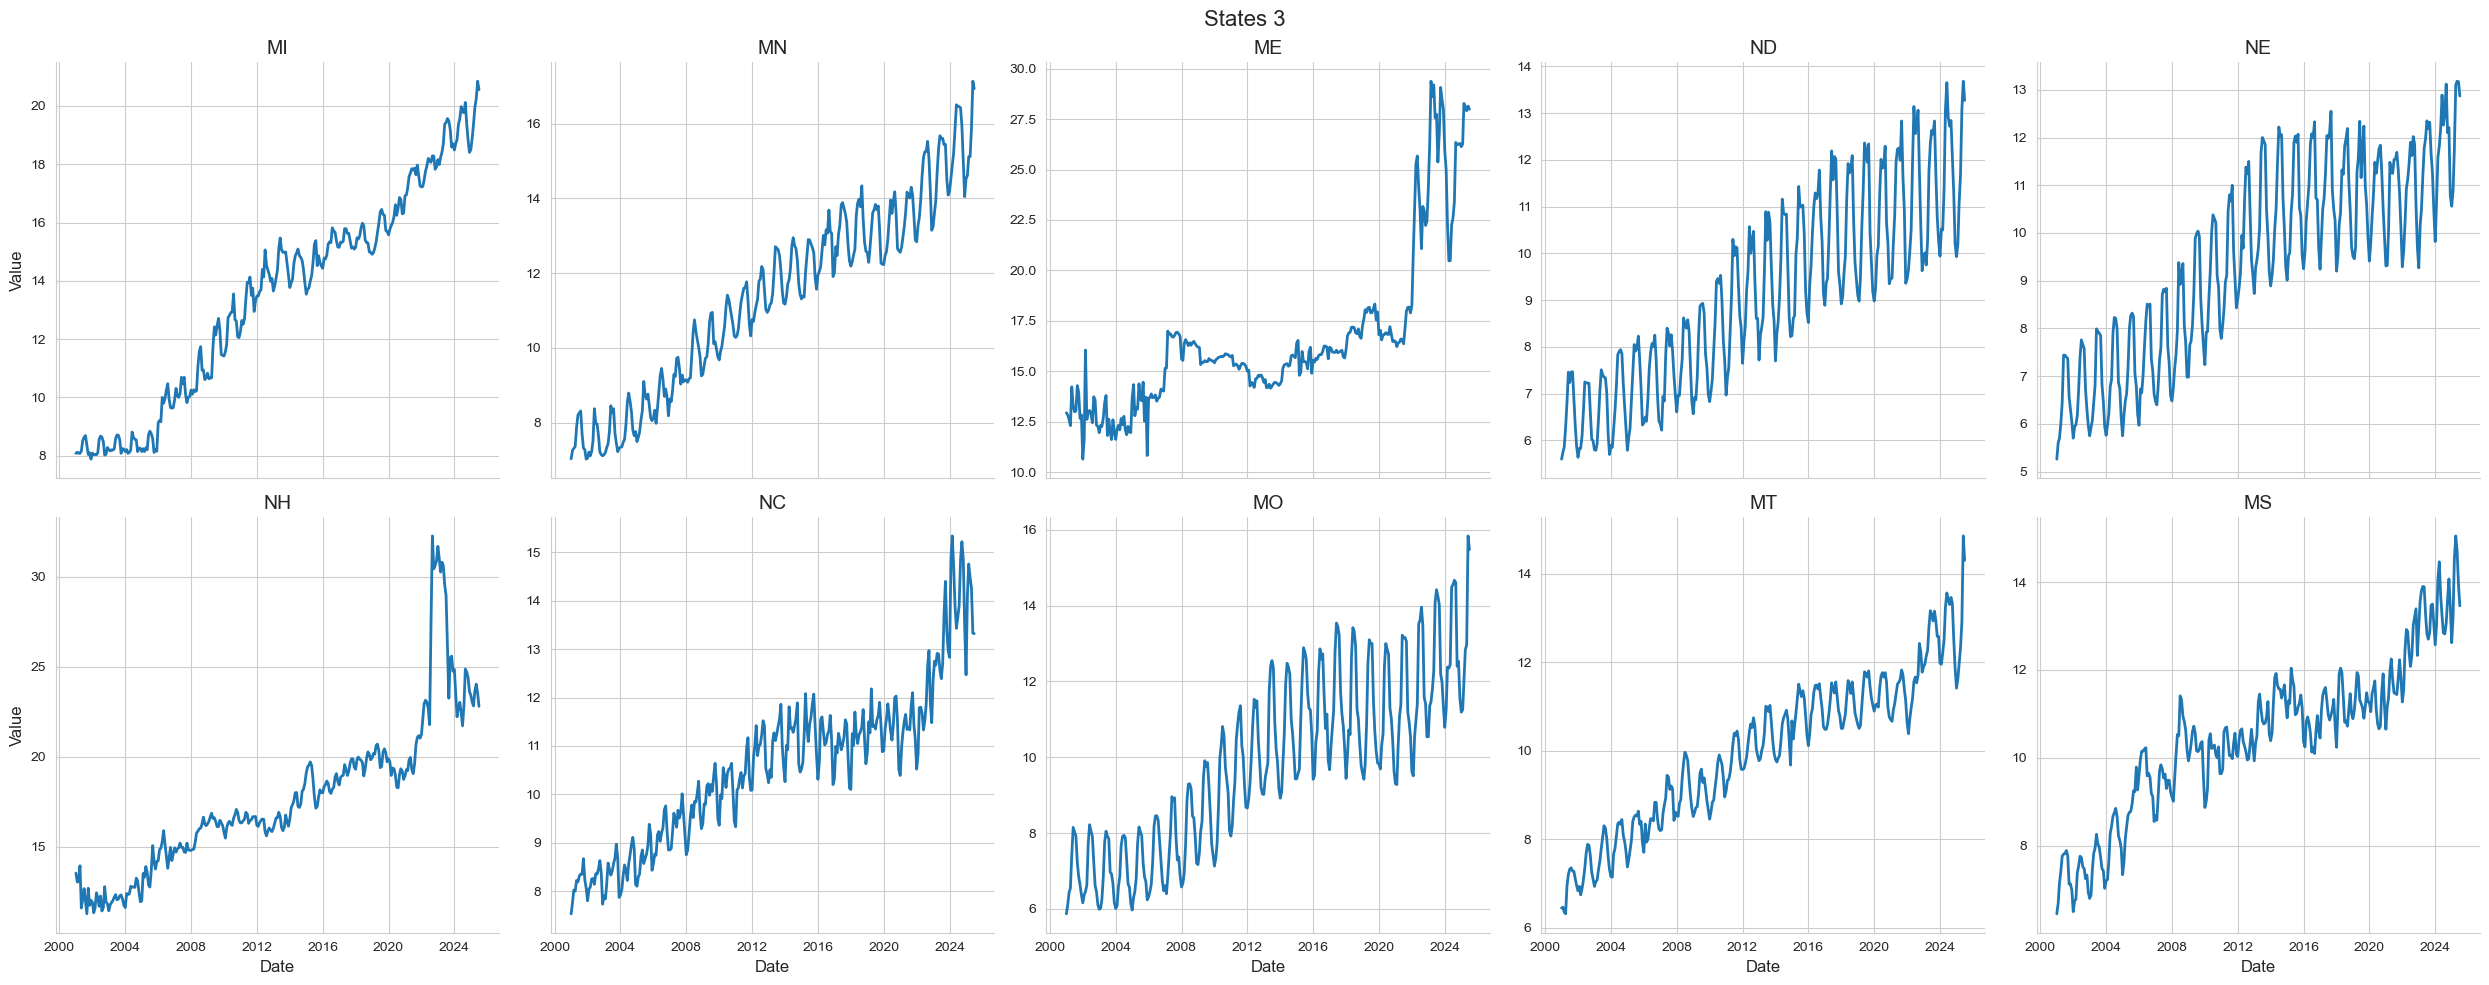

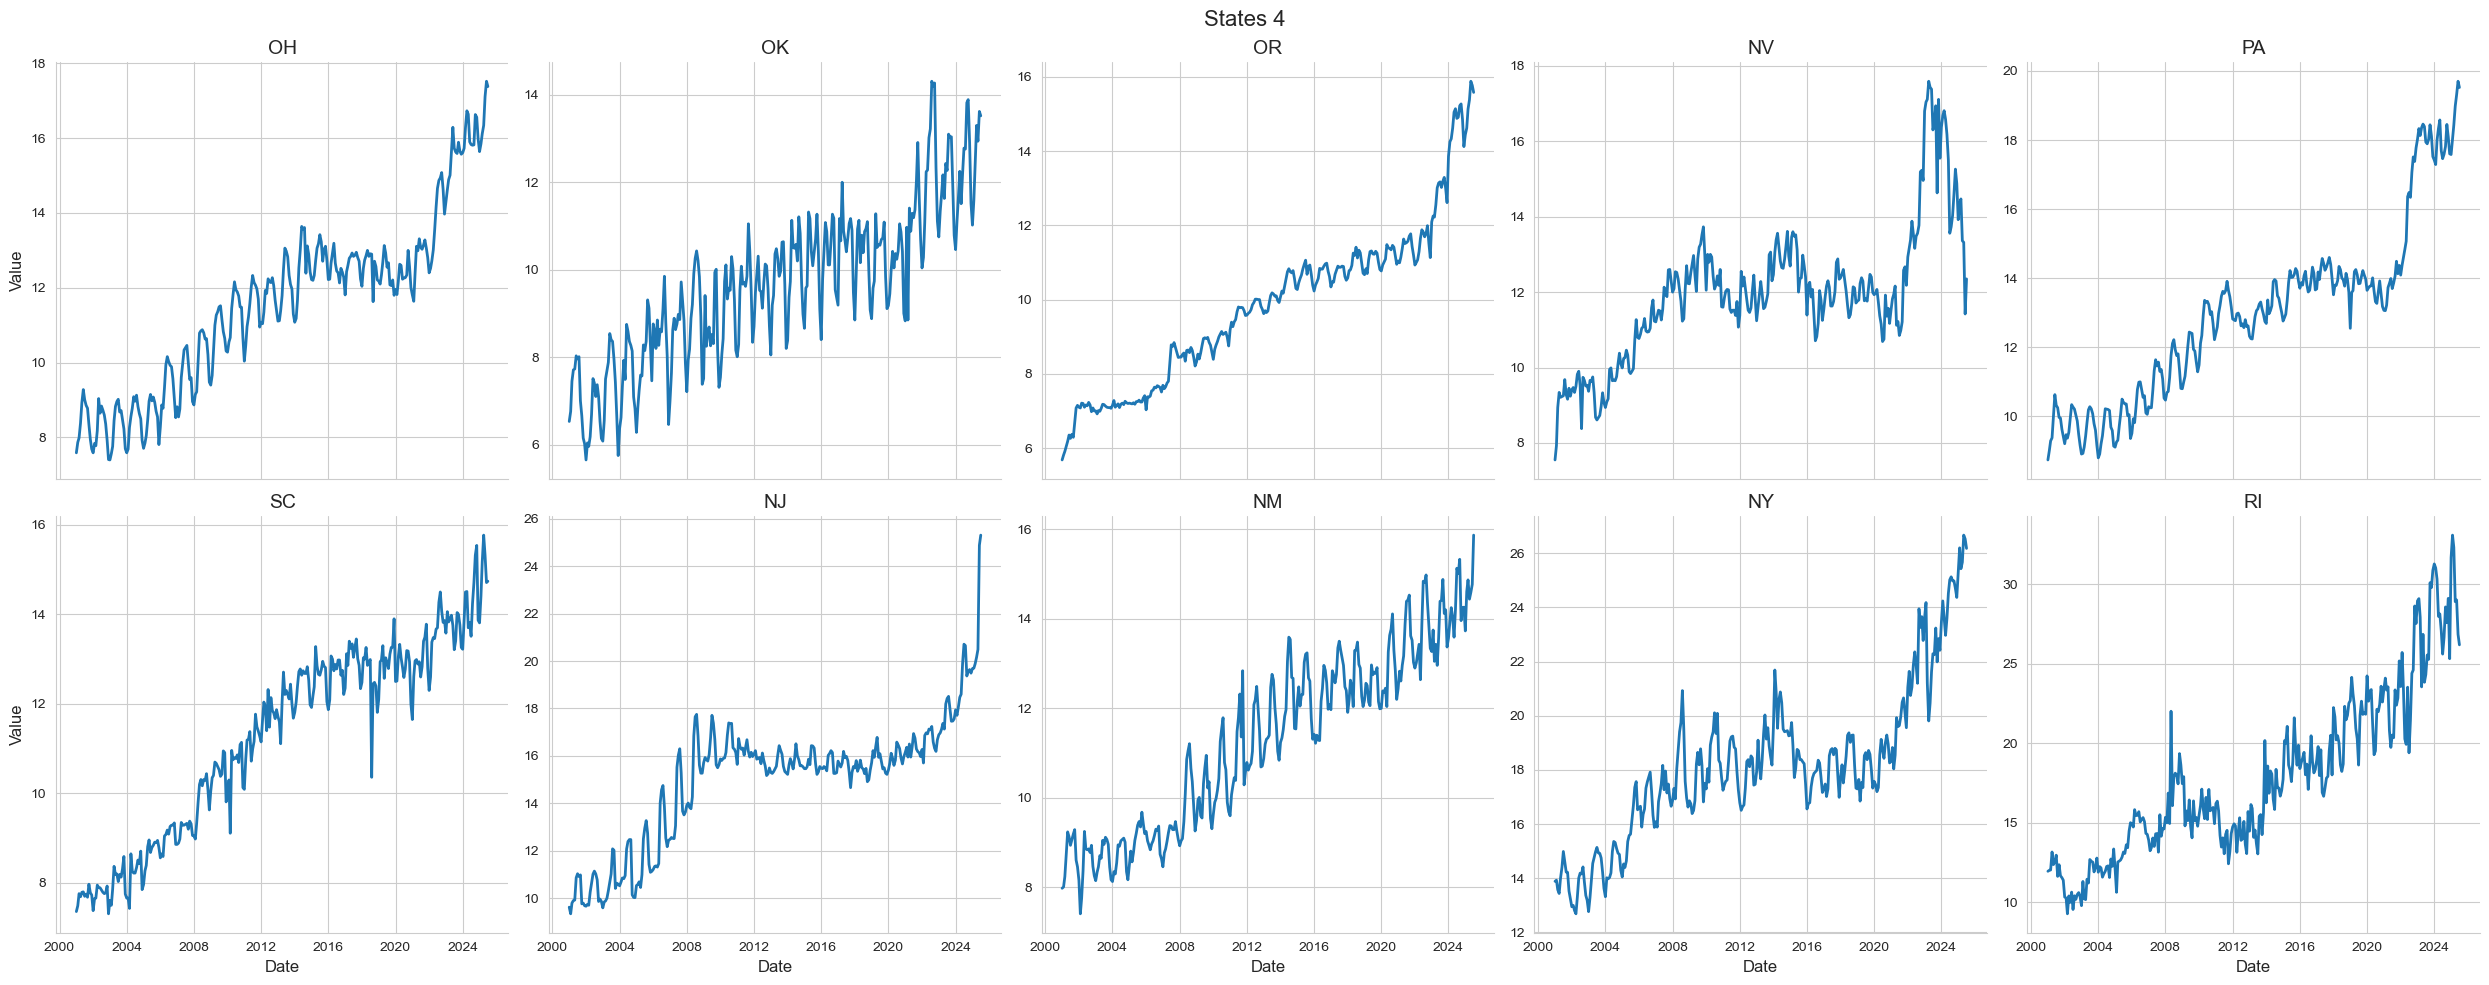

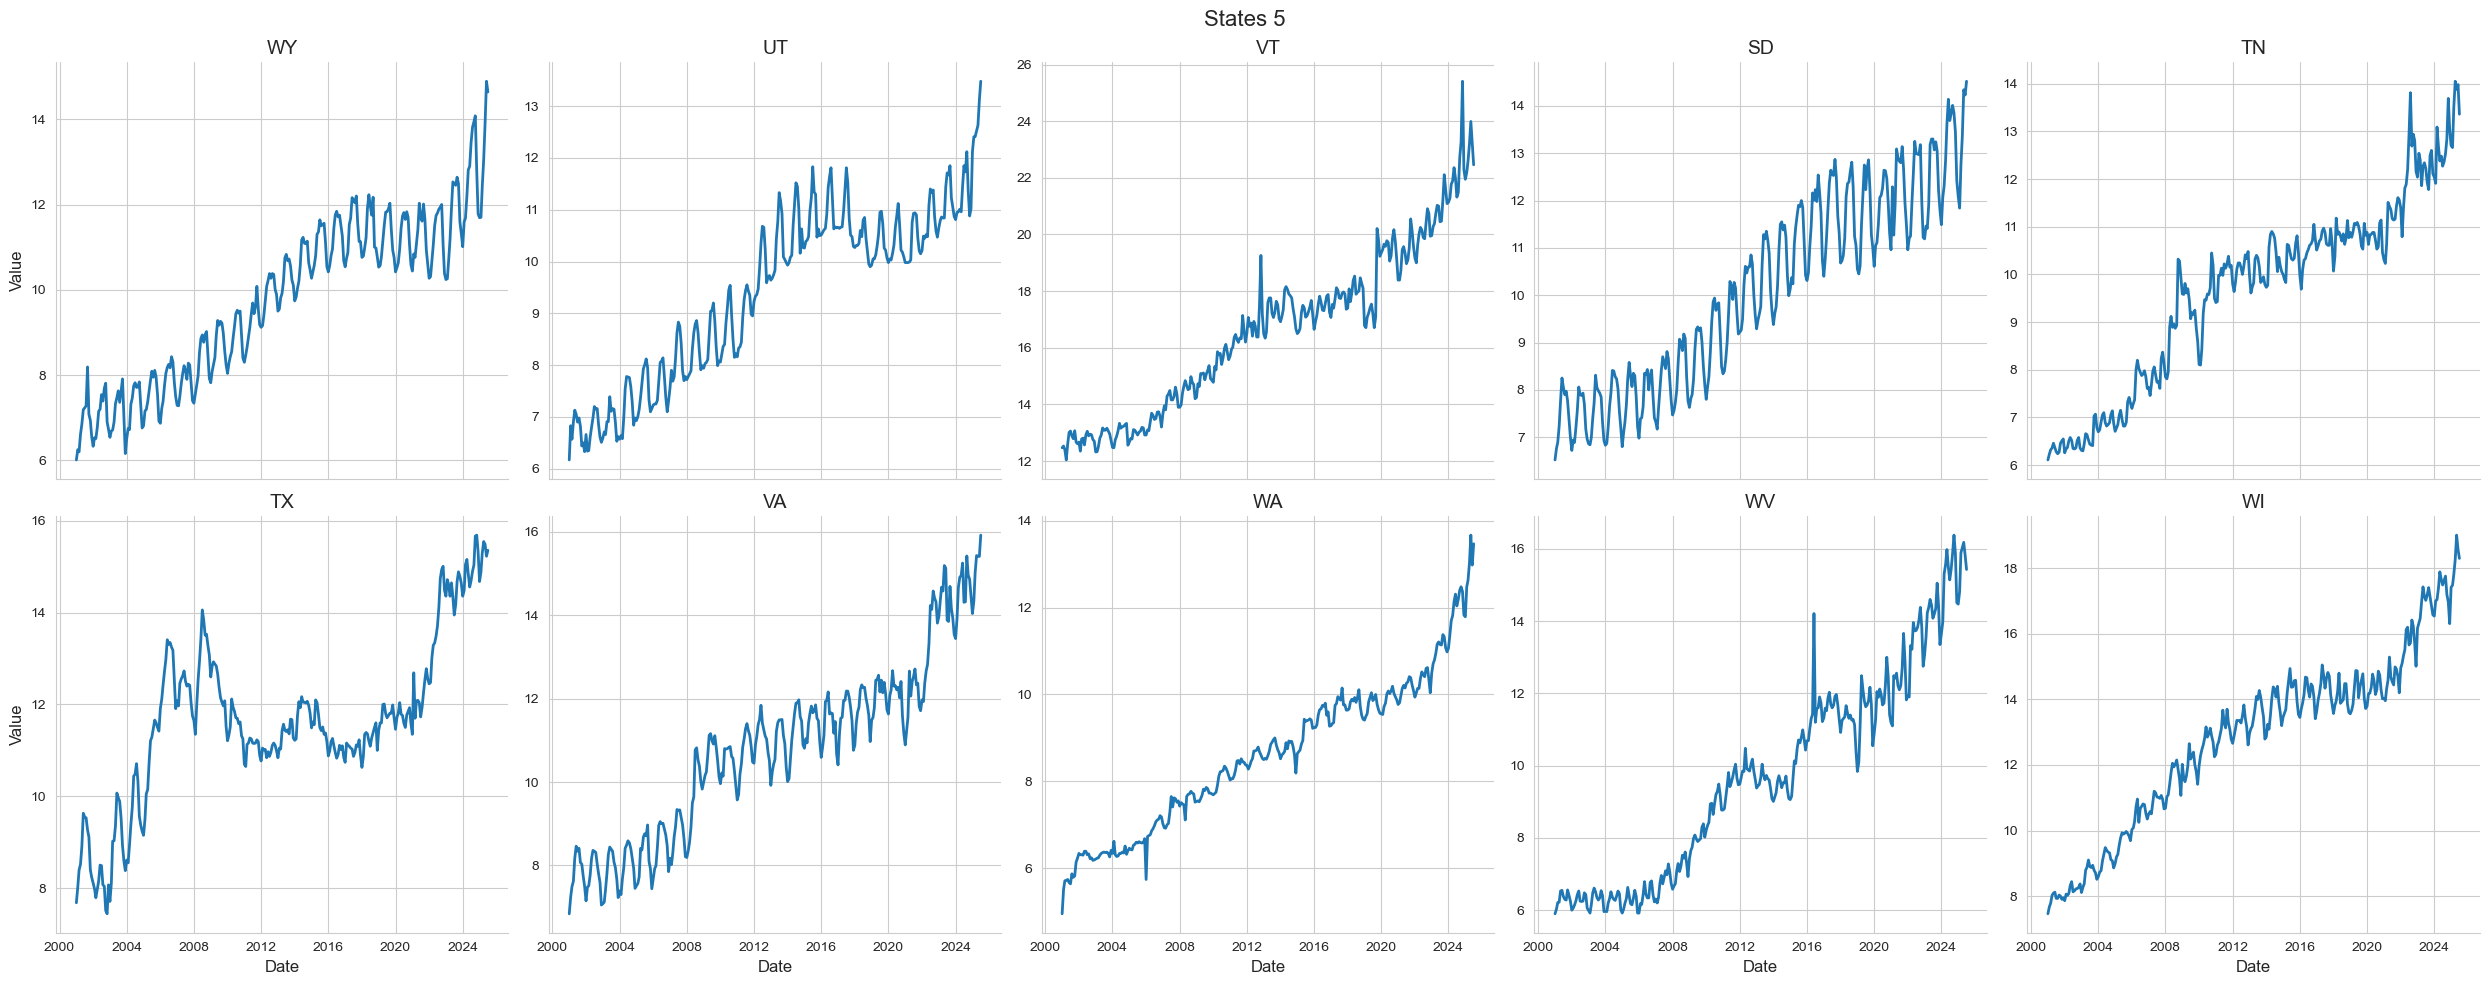

In [13]:
def chunks(lst, n):
    return [lst[i:i+n] for i in range(0, len(lst), n)]

# Partition states into groups of 10
state_groups = chunks(states, 10)

# Loop over each group and make a separate figure
for i, group in enumerate(state_groups, start=1):
    subset = residential_price[residential_price["stateid"].isin(group)]
    
    g = sns.relplot(
        data=subset,
        x="period", y="price",
        kind="line",
        col="stateid",
        col_wrap=5,      # 5 plots per row
        linewidth=2,
        facet_kws={"sharey": False, "sharex": True}
    )
    
    g.set_titles(col_template="{col_name}", size=14)
    g.set_axis_labels("Date", "Value", fontsize=12)
    
    plt.suptitle(f"States {i}", fontsize=16)
    plt.tight_layout()
    plt.show()  # or plt.savefig(f"states_group_{i}.png") to save each figure

## Inspection of two states

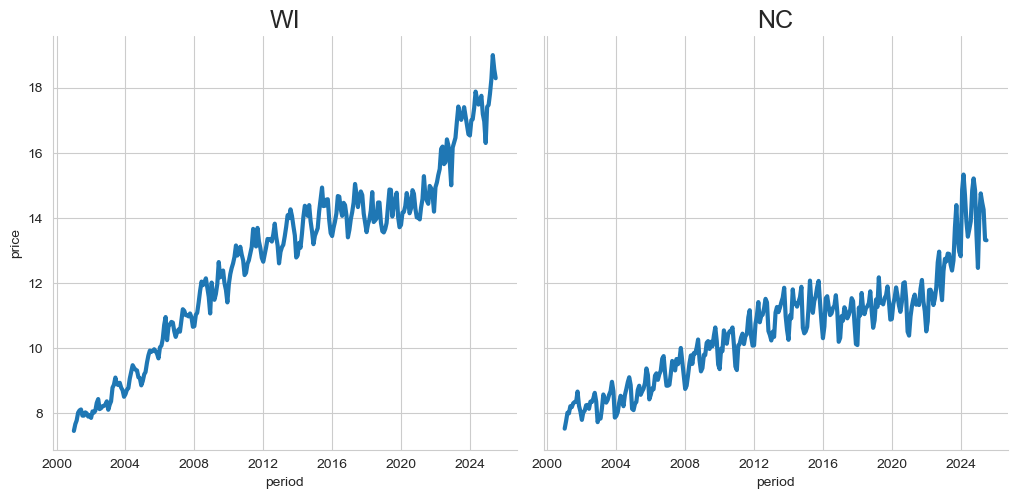

In [14]:
example_states = ['NC', 'WI']

plot = sns.relplot(data=residential_price[residential_price.stateid.isin(example_states)],
            x='period', y='price',
            kind='line',
            col='stateid',
            linewidth=3,
            col_wrap=5)
plot.set_titles(col_template='{col_name}', size=18)

In [15]:
gas_futures = pd.read_csv(os.path.join(DATA_PATH, 'nat_gas_futures.csv'))
gas_futures.head()

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2001-10,Y35NY,NEW YORK CITY,EPG0,Natural Gas,PE1,Future Contract 1,RNGC1,Natural Gas Futures Contract 1 (Dollars per Mi...,2.618,$/MMBTU
1,2001-11,Y35NY,NEW YORK CITY,EPG0,Natural Gas,PE1,Future Contract 1,RNGC1,Natural Gas Futures Contract 1 (Dollars per Mi...,2.786,$/MMBTU
2,2003-09,Y35NY,NEW YORK CITY,EPG0,Natural Gas,PE1,Future Contract 1,RNGC1,Natural Gas Futures Contract 1 (Dollars per Mi...,4.667,$/MMBTU
3,2003-12,Y35NY,NEW YORK CITY,EPG0,Natural Gas,PE1,Future Contract 1,RNGC1,Natural Gas Futures Contract 1 (Dollars per Mi...,6.469,$/MMBTU
4,2004-05,Y35NY,NEW YORK CITY,EPG0,Natural Gas,PE1,Future Contract 1,RNGC1,Natural Gas Futures Contract 1 (Dollars per Mi...,6.398,$/MMBTU


In [16]:
gas_futures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612 entries, 0 to 1611
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   period              1612 non-null   object 
 1   duoarea             1612 non-null   object 
 2   area-name           1318 non-null   object 
 3   product             1612 non-null   object 
 4   product-name        1612 non-null   object 
 5   process             1612 non-null   object 
 6   process-name        1612 non-null   object 
 7   series              1612 non-null   object 
 8   series-description  1612 non-null   object 
 9   value               1612 non-null   float64
 10  units               1612 non-null   object 
dtypes: float64(1), object(10)
memory usage: 138.7+ KB


In [17]:
gas_futures.describe()

,value
count,1612.000000
mean,5.011514
std,2.676576
min,1.490000
25%,2.950000
50%,4.195500
75%,6.490000
max,15.880000


In [18]:
gas_futures['period'] = pd.to_datetime(gas_futures['period'], format='%Y-%m')

In [19]:
gas_futures.groupby(by='series')

According to google, the henry hub natural gas (series RNGWHHD) is the largest futures contract and usually the global benchmark. Lets focus on this.

In [20]:
gas_futures = gas_futures[gas_futures.series == 'RNGWHHD']
gas_futures.head(294)

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
162,2001-05-01,RGC,NaN,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,4.19,$/MMBTU
163,2001-09-01,RGC,NaN,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,2.19,$/MMBTU
164,2002-05-01,RGC,NaN,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,3.50,$/MMBTU
165,2003-09-01,RGC,NaN,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,4.62,$/MMBTU
166,2004-09-01,RGC,NaN,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,5.15,$/MMBTU
...,...,...,...,...,...,...,...,...,...,...,...
1607,2019-10-01,RGC,NaN,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,2.33,$/MMBTU
1608,2020-06-01,RGC,NaN,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,1.63,$/MMBTU
1609,2022-05-01,RGC,NaN,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,8.14,$/MMBTU
1610,2024-08-01,RGC,NaN,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,1.99,$/MMBTU


In [21]:
gas_futures.describe()

,period,value
count,294,294.000000
mean,2013-03-17 00:34:17.142857216,4.330510
min,2001-01-01 00:00:00,1.490000
25%,2007-02-08 00:00:00,2.800000
50%,2013-03-16 12:00:00,3.740000
75%,2019-04-23 12:00:00,5.445000
max,2025-06-01 00:00:00,13.420000
std,NaN,2.165221


<Axes: xlabel='period', ylabel='value'>

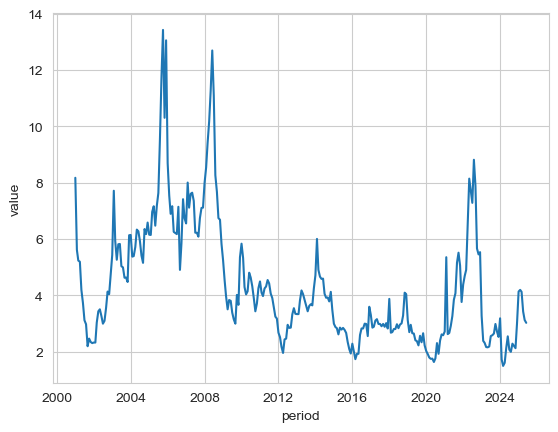

In [22]:
sns.lineplot(data=gas_futures, x='period', y='value')

In [36]:
gas_futures_monthly = gas_futures[['period', 'value']].set_index('period').reindex(
    pd.date_range(gas_futures['period'].min(), gas_futures['period'].max(), freq='MS')
)
gas_futures_monthly['value'] = gas_futures_monthly['value'].ffill()

In [38]:
gas_futures_monthly

,value
2001-01-01,8.17
2001-02-01,5.61
2001-03-01,5.23
2001-04-01,5.19
2001-05-01,4.19
...,...
2025-02-01,4.19
2025-03-01,4.12
2025-04-01,3.42
2025-05-01,3.12


In [39]:
gas_futures_monthly.describe()

,value
count,294.000000
mean,4.330510
std,2.165221
min,1.490000
25%,2.800000
50%,3.740000
75%,5.445000
max,13.420000


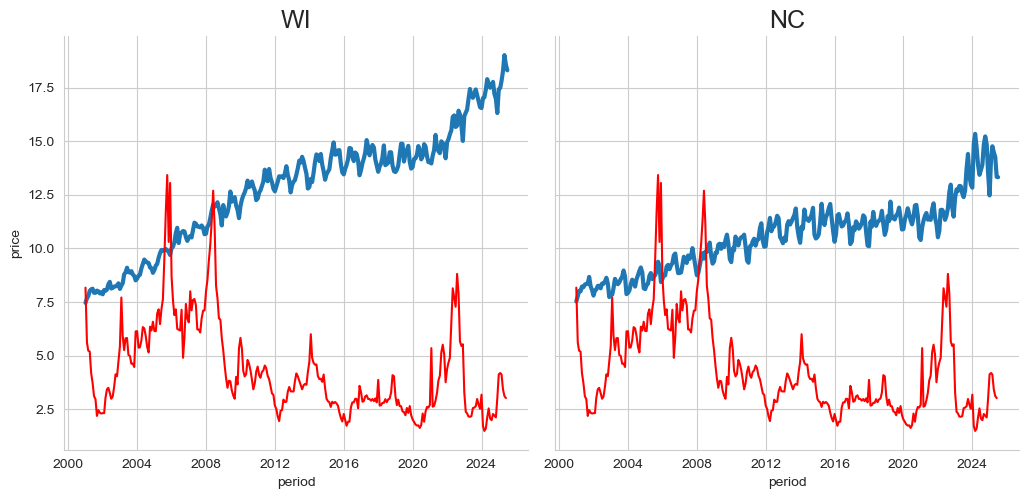

In [41]:
example_states = ['NC', 'WI']

plot = sns.relplot(data=residential_price[residential_price.stateid.isin(example_states)],
            x='period', y='price',
            kind='line',
            col='stateid',
            linewidth=3,
            col_wrap=5)
plot.set_titles(col_template='{col_name}', size=18)

for ax in plot.axes.flat:
    ax.plot(gas_futures_monthly.index, gas_futures_monthly['value'], color='red')
plt.show()